In [2]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 10

In [3]:
m6 = pd.read_csv('./data/assets_m6.csv')
m6_subset = pd.DataFrame()

for M in assetlist: 
    m6_subset[M] = m6[m6['symbol'] == M]['price'].values

In [4]:
m6_subset = m6_subset.apply(np.log).rolling(10).mean().diff().dropna()
print(m6_subset)

          IEF       GSG       IXN
10  -0.001878  0.004799 -0.004710
11  -0.002042  0.002259 -0.002013
12  -0.002037  0.001592 -0.002763
13  -0.001077  0.001889 -0.002938
14   0.000018  0.000861 -0.004356
..        ...       ...       ...
194  0.000290  0.005585 -0.001463
195 -0.000286  0.003399 -0.002283
196 -0.000453 -0.001500 -0.002852
197  0.001061 -0.000679  0.006195
198  0.001369  0.001982  0.004565

[189 rows x 3 columns]


In [5]:
dpgmm_model = mix.BayesianGaussianMixture(n_components=num_components, weight_concentration_prior_type='dirichlet_process').fit(m6_subset)

In [6]:
states = dpgmm_model.predict(m6_subset)

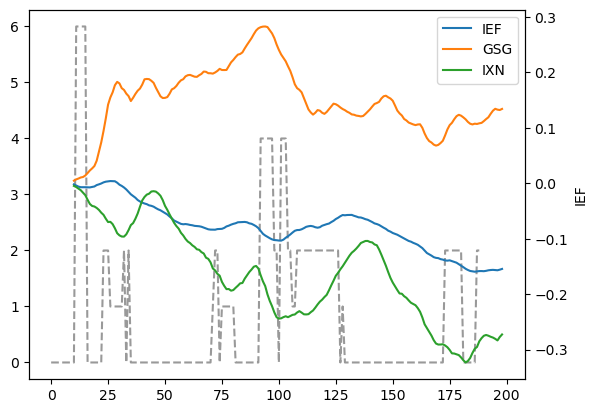

In [7]:
fig,ax = plt.subplots()
axx = ax.twinx()

sns.lineplot(data=states, ax=ax, linestyle='--', color='black', alpha=0.4)
sns.lineplot(data=m6_subset['IEF'].cumsum(), ax=axx, label='IEF')
sns.lineplot(data=m6_subset['GSG'].cumsum(), ax=axx, label='GSG')
sns.lineplot(data=m6_subset['IXN'].cumsum(), ax=axx, label='IXN')

plt.legend()
plt.show()

In [8]:
state_counts = np.zeros(num_components)
for M in states:
  state_counts[M] += 1 

print(dpgmm_model.means_)
print(state_counts)

[[-1.37103398e-03  5.32785714e-04 -4.68956108e-03]
 [-1.15681681e-03  4.72172339e-03  3.82424868e-03]
 [-5.99374788e-05 -1.20707802e-03  4.96553685e-03]
 [-8.20674386e-04  7.17596174e-04 -1.44540715e-03]
 [ 1.88408863e-03 -7.85508677e-03  3.01428498e-04]
 [-8.19877543e-04  7.15943327e-04 -1.44479684e-03]
 [ 8.34798165e-04  1.57442935e-02 -4.34762458e-03]
 [-8.17131925e-04  7.10229273e-04 -1.44268635e-03]
 [-8.17131827e-04  7.10229069e-04 -1.44268627e-03]
 [-8.17131827e-04  7.10229069e-04 -1.44268627e-03]]
[119.  16.  40.   0.   9.   0.   5.   0.   0.   0.]
